In [37]:
import os
from os.path import join
import eland as ed
import pandas as pd
import numpy as np
from collections import Counter

## Importing data from Elasticsearch
### We're using elasticsearch database for storing the tweets. The following cell retrieves the tweets from the ES instance running locally

In [3]:
ed_df = ed.DataFrame('localhost', 'twitter')

# defining the full-text query we need: Retrieving records for full_text_processed with the condition is_retweet=False and is_quote_status=False

query_unique = {
    "bool": {
        "must": {
            "term":{"is_retweet":"false"},
        },
        "filter": {
            "term":{"is_quote_status":"false"}
        },
    }
}

# using full-text search capabilities with Eland:
df_ed = ed_df.es_query(query_unique)
df_ed = df_ed.to_pandas()

In [15]:
columns = ['full_text_trans', 'full_text_processed', 'pov', 'topics', 'sentiment', 'location', 'retweet_count', 'favorite_count', 'name', 'description', 'reply_count', 'verified']
df_tweets = df_ed[columns]
df_tweets['length'] = df_tweets['full_text_processed'].apply(lambda x: len([w for w in x.split()]))
df_tweets = df_tweets[df_tweets['topics'].notna() & df_tweets['full_text_trans'].notna()]

<AxesSubplot:>

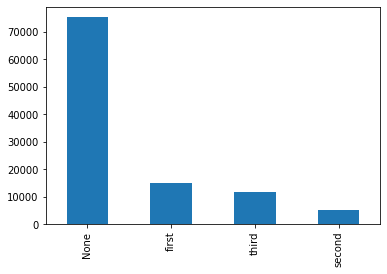

In [16]:
df_tweets['pov'].value_counts().plot.bar()

In [17]:
unidentified = df_tweets[df_tweets['pov']=='None']
unid_10_largest = unidentified.nlargest(10, ['retweet_count', 'favorite_count'])[['name', 'description', 'full_text_trans']]

unid_10_largest

,name,description,full_text_trans
1263213348000325632,Twitter,bye,u up? @NASA
1263815469145788416,Narendra Modi,Prime Minister of India,Deeply saddened by the loss of life due to a p...
1268206270168723456,Sudarsan Pattnaik,Official Twitter account of International Sand...,Humanity has failed again...........\nOne of m...
1262772783467188224,CNN,It’s our job to #GoThere & tell the most diffi...,Daily carbon emissions declined 17% between Ja...
1263176697190526976,Imran Khan,Prime Minister of Pakistan,15 homes torched by Indian Occupation forces i...
1262792224284332032,Babita Phogat,This is the Official account . #IndianWrestler...,"Send bus from here,\nFrom there the tempo will..."
1262969124227035136,Saloni Gaur (Nazma Aapi),Comedian | Still can't believe that my parents...,Nazma Aapi on Corona at Zee News. https://t.co...
1268186278052237312,Rofl Gandhi 2.0,"Parody. Not Rahul Gandhi. टोल- मुक्त भारत, पहल...","Peeche ek banda normally kaam kar raha hai, le..."
1263847233742532608,Narendra Modi,Prime Minister of India,The nation stands in solidarity with our siste...
1263384064616103936,Narendra Modi,Prime Minister of India,Have been seeing visuals from West Bengal on t...


In [18]:
first = df_tweets[df_tweets['pov'] == 'first']
f_10_largest = first.nlargest(10, ['retweet_count', 'favorite_count'])[['name', 'description', 'full_text_trans']]

f_10_largest

,name,description,full_text_trans
1262797667677212672,Joe Biden,"Senator, Vice President, 2020 candidate for Pr...",We need a president who believes in science.
1263516296093863936,MrBeast,I want to make the world a better place before...,"If you reply to this tweet I’ll give you $10,000!"
1266152680428236800,God,Unverified. Unverified. Thee/thou/thine. \n\nI...,I have lost control of the situation.
1263320513276817408,Rahul Gandhi,This is the official account of Rahul Gandhi |...,"I am proud to be the son of a true patriot, li..."
1263108871314235392,Charlie Kirk,Founder & President—@TPUSA\nChair—@TrumpStuden...,I would rather hear Trump's brutal truths than...
1263828248250576896,Rahul Gandhi,This is the official account of Rahul Gandhi |...,I’m sorry to hear about the air crash in Pakis...
1262940130576302080,Narendra Modi,Prime Minister of India,It would make every Indian proud that the numb...
1262982187810344960,Chetan Bhagat,The CB family!,We wrecked our economy. Because:\n\n1. We car...
1262655826503692288,Rahul Gandhi,This is the official account of Rahul Gandhi |...,Amphon storm is coming in the country amidst C...
1265273541340979200,Piyush Goyal,"Minister of Railways and Commerce & Industry, ...",85 out of 145 trains were to run from Maharash...


In [19]:
second = df_tweets[df_tweets['pov'] == 'second']
s_10_largest = second.nlargest(10, ['retweet_count', 'favorite_count'])[['name', 'description', 'full_text_trans']]

s_10_largest

,name,description,full_text_trans
1263091517767536640,Sudhir Chaudhary,"Editor In Chief, Zee News, Zee Business, WION....",Well done @RubikaLiyaquat for standing up for ...
1264121291365216256,Devvesh Pandey | देवेश पांडेय | دیویش پانڈے۔,"Journalist, Bharat Samachar @bstvlive | Blogge...",Incident: Pipla police station area of ​​Chhin...
1263843321857753088,Naveen Patnaik,"Chief Minister of Odisha; \nPresident, Biju Ja...",Thank you PM @narendramodi ji for visiting #Od...
1262749746394853376,Akhilesh Yadav,Socialist Leader of India. Chief Minister of U...,The government of Uttar Pradesh is harassing t...
1263430598070284288,The New York Times,News tips? Share them here: http://nyti.ms/2FV...,In Opinion\n\nIf you care about the working po...
1268233704377397248,Manoj Joshi,Actor | book.manojjoshi@gmail.com,"Look at the condition of your world, God, how ..."
1266782947014635520,Gurpreet Garry Walia,पत्रकार .. follow me on instagram : @garrywali...,Rahul Gandhi would have been on this chair\n\n...
1266131643963670528,Melania Trump,This account is run by the Office of First Lad...,"Very informative briefing with @POTUS, @VP, @D..."
1263383375475175424,Kanhaiya Kumar,Former President of JNU Students' Union; Autho...,There have been reports of heavy damage due to...
446602988501491712,narendramodi_in,Twitter account of http://www.narendramodi.in ...,Its become a fashion to declare a package afte...


In [20]:
third = df_tweets[df_tweets['pov'] == 'third']
t_10_largest = third.nlargest(10, ['retweet_count', 'favorite_count'])[['name', 'description', 'full_text_trans']]

t_10_largest

,name,description,full_text_trans
1263828899575758848,Ivanka Trump,"Wife, mother, sister, daughter. Advisor to POT...","15 yr old Jyoti Kumari, carried her wounded fa..."
1263309240875102208,Narendra Modi,Prime Minister of India,"On his death anniversary, tributes to former P..."
1267150918165749760,LU$T//OWAI$,✨XO,Creepy noises heard in Bryan Texas with lightn...
1262984511890964480,Aditi Singh,"Member of Legislative Assembly, Raebareli Sada...",When thousands of UP children were stranded in...
1267843906491879424,Anand Ranganathan,Author: Land of the Wilted Rose (Rupa); Love &...,"On the hate, selectivity, lies, and propaganda..."
1263131409390227456,Narendra Modi,Prime Minister of India,"During today’s Cabinet meeting, important deci..."
1263487665791352832,PMO India,Office of the Prime Minister of India,"Tomorrow, PM @narendramodi will travel to West..."
1263674400978563072,Mayawati,"National President, Bahujan Samaj Party (BSP),...",1. The demand that the Congress government of ...
596082880217882624,Shah Rukh Khan,None,Lessons from my littlest one…“Just because it’...
1268050015164874752,⅁N∩⅄HƎ∀⊥💜¹¹⁵⟭⟬,https://open.spotify.com/track/39EXZNMxb4RBHlR...,Taehyung got the most hate from his own Fandom...


In [27]:
print(unidentified['verified'].value_counts())
print()
print('Median sentiment:', unidentified['sentiment'].median())
print()
print(unidentified[['retweet_count', 'favorite_count', 'reply_count']].describe())

False    65217
True     10058
Name: verified, dtype: int64

Median sentiment: 0.0

       retweet_count  favorite_count   reply_count
count   75275.000000    75275.000000  75275.000000
mean        8.501627       41.837821      2.152933
std       214.054101     1229.198018     69.812545
min         0.000000        0.000000      0.000000
25%         0.000000        0.000000      0.000000
50%         0.000000        0.000000      0.000000
75%         1.000000        2.000000      0.000000
max     27047.000000   192057.000000   9986.000000


In [30]:
print(first['verified'].value_counts())
print()
print('Median sentiment:', first['sentiment'].median())
print()
print(first[['retweet_count', 'favorite_count', 'reply_count']].describe())

False    13355
True      1453
Name: verified, dtype: int64

Median sentiment: 0.0516

       retweet_count  favorite_count   reply_count
count   14808.000000    14808.000000  14808.000000
mean       33.174500      196.405862     12.434765
std       570.022407     3984.001067    313.402536
min         0.000000        0.000000      0.000000
25%         0.000000        0.000000      0.000000
50%         0.000000        1.000000      0.000000
75%         1.000000        3.000000      1.000000
max     42995.000000   332386.000000  31719.000000


In [31]:
print(second['verified'].value_counts())
print()
print('Median sentiment:', second['sentiment'].median())
print()
print(second[['retweet_count', 'favorite_count', 'reply_count']].describe())

False    4346
True      975
Name: verified, dtype: int64

Median sentiment: 0.2732

       retweet_count  favorite_count  reply_count
count    5321.000000     5321.000000  5321.000000
mean       20.779929       92.874084     7.170833
std       469.559619     2068.376892   187.166584
min         0.000000        0.000000     0.000000
25%         0.000000        0.000000     0.000000
50%         0.000000        0.000000     0.000000
75%         0.000000        2.000000     1.000000
max     26243.000000   112431.000000  8480.000000


In [32]:
print(third['verified'].value_counts())
print()
print('Median sentiment:', third['sentiment'].median())
print()
print(third[['retweet_count', 'favorite_count', 'reply_count']].describe())

False    10081
True      1452
Name: verified, dtype: int64

Median sentiment: 0.0

       retweet_count  favorite_count   reply_count
count   11533.000000    11533.000000  11533.000000
mean       23.390011      108.269314      6.283534
std       381.303384     2205.714225    130.330171
min         0.000000        0.000000      0.000000
25%         0.000000        0.000000      0.000000
50%         0.000000        1.000000      0.000000
75%         2.000000        5.000000      0.000000
max     24152.000000   145245.000000  10044.000000


In [ ]:
N = 5
topic_users = []
for id, row in df_users.iterrows():
    topic_list = df_tweets[df_tweets['user_id']==id]['topics']
    topic_counter = [item for x in topic_list for item in x]
    top_n = sorted(Counter(topic_counter), key = Counter(topic_counter).get, reverse = True)[:N]
    topic_users.append(top_n)

In [47]:
def top_N_topics(pov, N):
    topic_list = pov['topics']
    topic_counter = [item for x in topic_list for item in x]
    top_n = sorted(Counter(topic_counter), key = Counter(topic_counter).get, reverse = True)[:N]
    return top_n

In [54]:
print("Top N topics for first person pov ->", top_N_topics(first, 7))
print()
print("Top N topics for second person pov ->", top_N_topics(second, 7))
print()
print("Top N topics for third person pov ->", top_N_topics(third, 7))

Top N topics for first person pov -> ['sympathy', 'criticism', 'relief measures', 'hope', 'petition', 'news updates', 'government']

Top N topics for second person pov -> ['sympathy', 'relief measures', 'criticism', 'cellular network', 'petition', 'news updates', 'hope']

Top N topics for third person pov -> ['criticism', 'relief measures', 'sympathy', 'government', 'news updates', 'hope', 'petition']
